### Etude des variables dans la catégorie solvabilité

In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data.columns.tolist()
# Supprimer les espaces en trop autour des noms de colonnes
data.columns = data.columns.str.strip()

In [232]:
solvabilite = [
    "ROA(C) before interest and depreciation before interest",
    "ROA(A) before interest and % after tax",
    "ROA(B) before interest and depreciation after tax",
    "Operating Gross Margin",
    "Realized Sales Gross Margin",
    "Operating Profit Rate",
    "Pre-tax net Interest Rate",
    "After-tax net Interest Rate",
    "Non-industry income and expenditure/revenue",
    "Continuous interest rate (after tax)",
    "Operating Expense Rate",
    "Research and development expense rate",
    "Cash flow rate",
    "Persistent EPS in the Last Four Seasons",
    "Cash Flow Per Share",
    "Retained Earnings to Total Assets"
]



data_solv = data[[col for col in data.columns if col in solvabilite]]
len(solvabilite)

16

<Axes: >

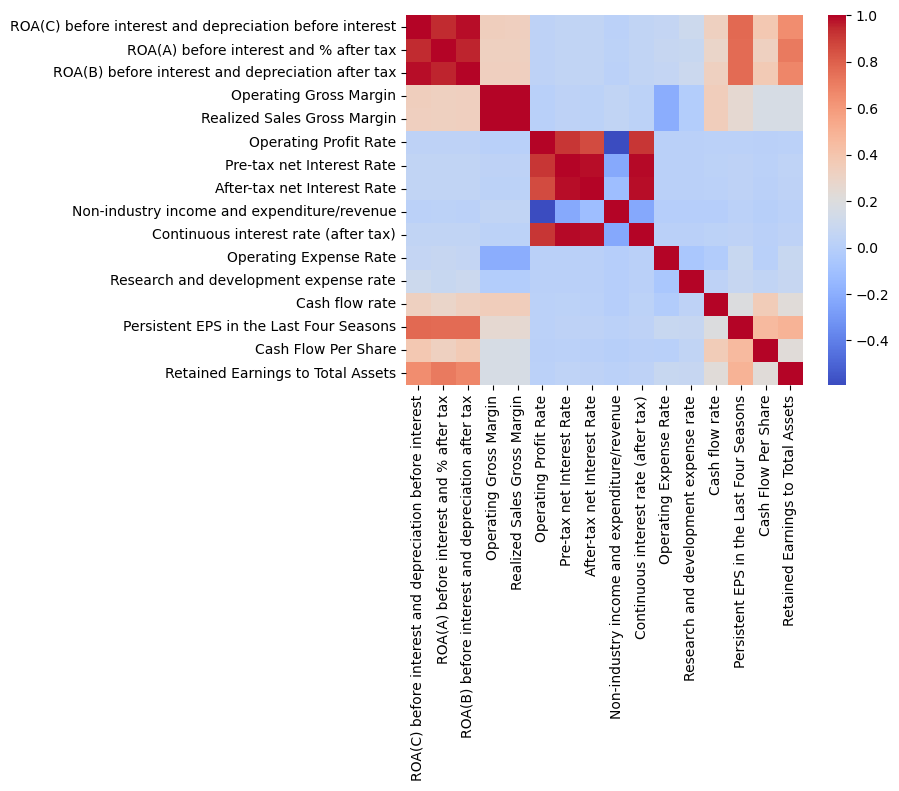

In [233]:
corr = data_solv.corr()
sns.heatmap(corr, cmap='coolwarm')

3.6602159519973534


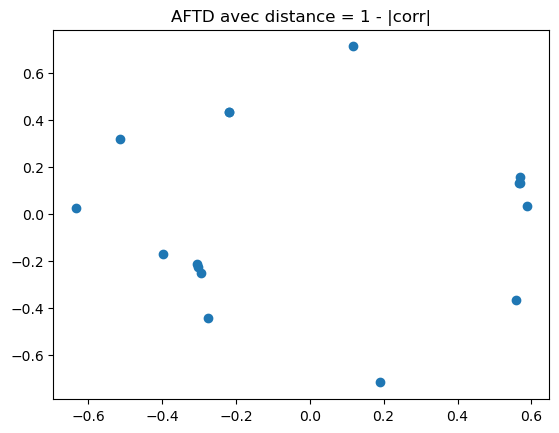

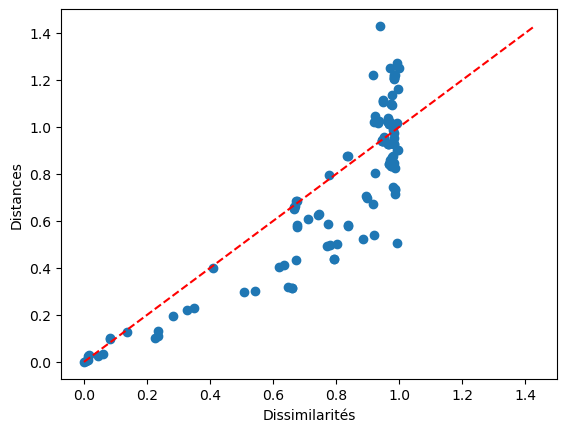

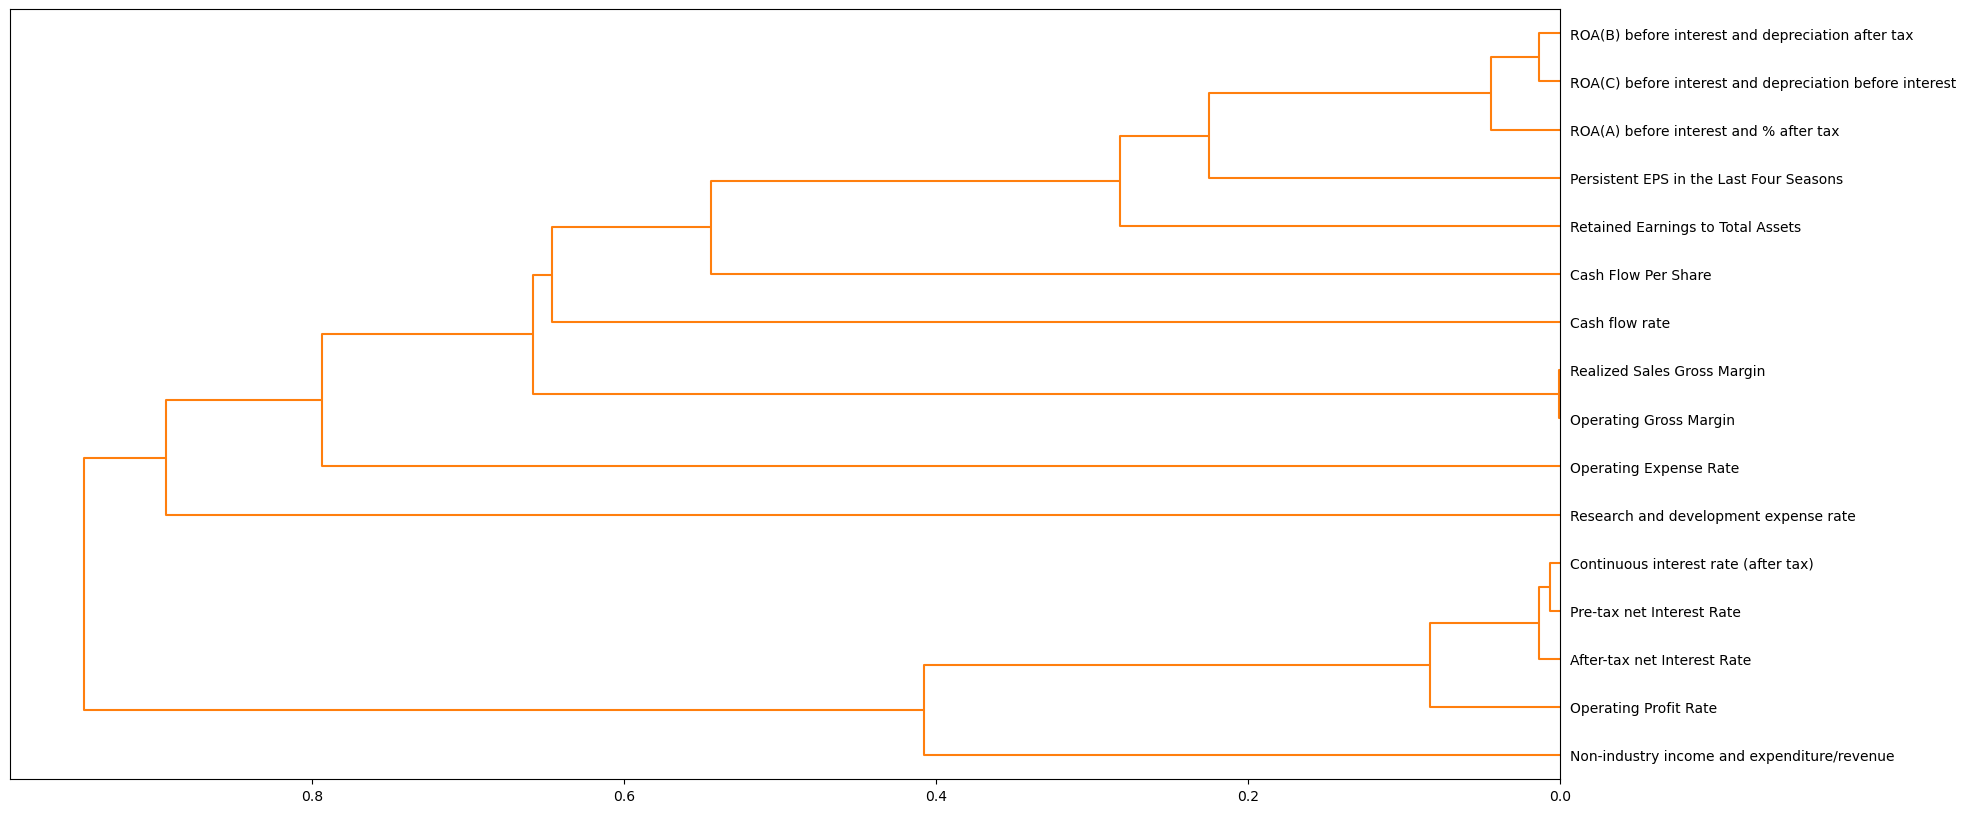

In [12]:
from sklearn.manifold import MDS
from src1.utils import plot_Shepard
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Méthode 1 : distance = 1 - |corrélation|
distance1 = 1-abs(corr)


aftd = MDS(n_components=2, dissimilarity='precomputed')
dist1 = aftd.fit_transform(distance1)
print(aftd.stress_)
plt.scatter(*dist1.T)
plt.title("AFTD avec distance = 1 - |corr|")
plt.show()
plot_Shepard(aftd)
plt.show()

cls = AgglomerativeClustering(metric="precomputed", linkage="single", n_clusters=None, distance_threshold=0).fit(distance1)
plt.figure(figsize=(20, 10))
plot_dendrogram(cls, color_threshold=1, labels=corr.columns, orientation="left")

In [5]:
data_solv['Bankrupt'] = data['Bankrupt?'].values
data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values

C:\Users\arthu\AppData\Local\Temp\ipykernel_12720\3523034060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Bankrupt'] = data['Bankrupt?'].values
C:\Users\arthu\AppData\Local\Temp\ipykernel_12720\3523034060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values


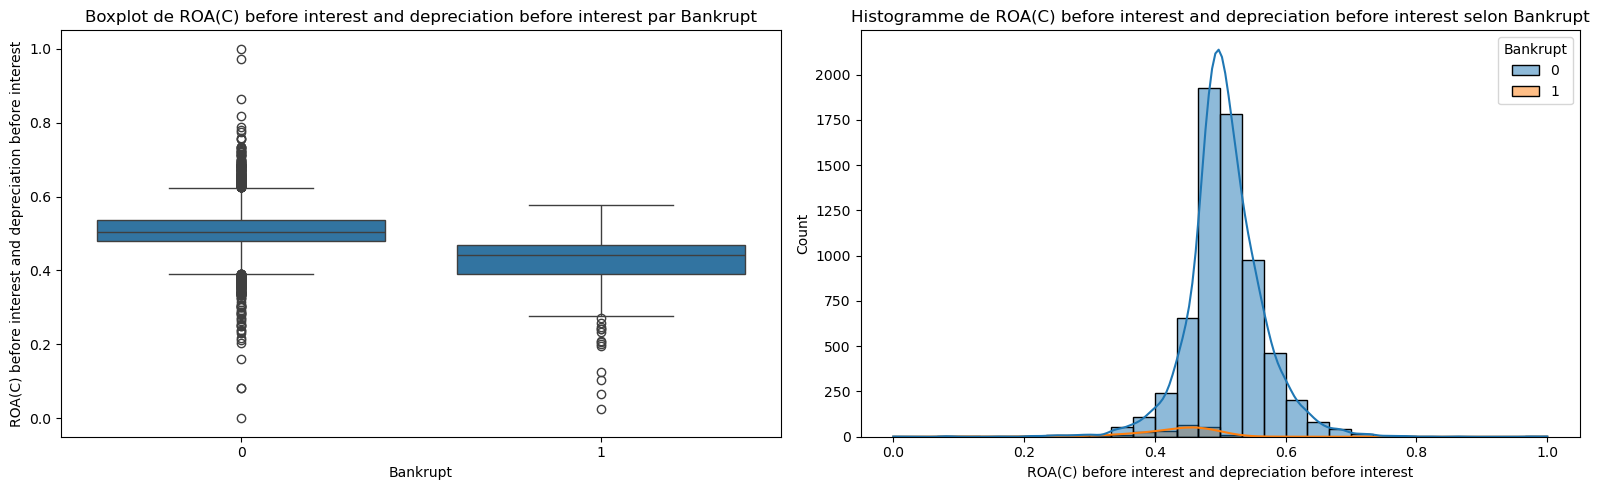

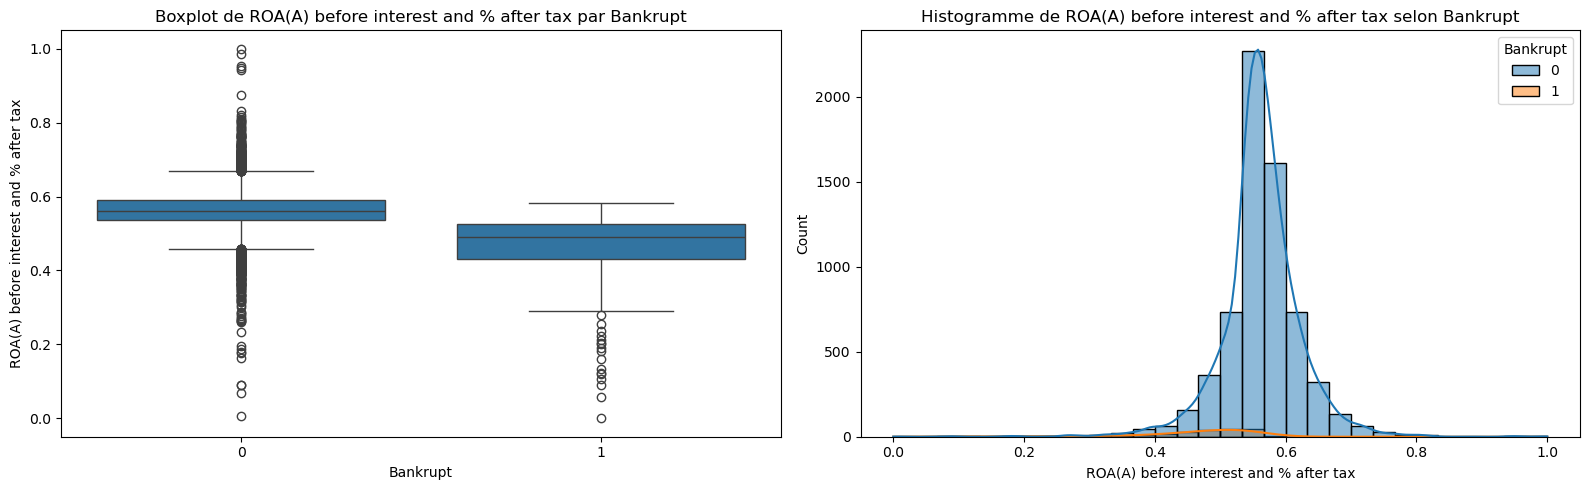

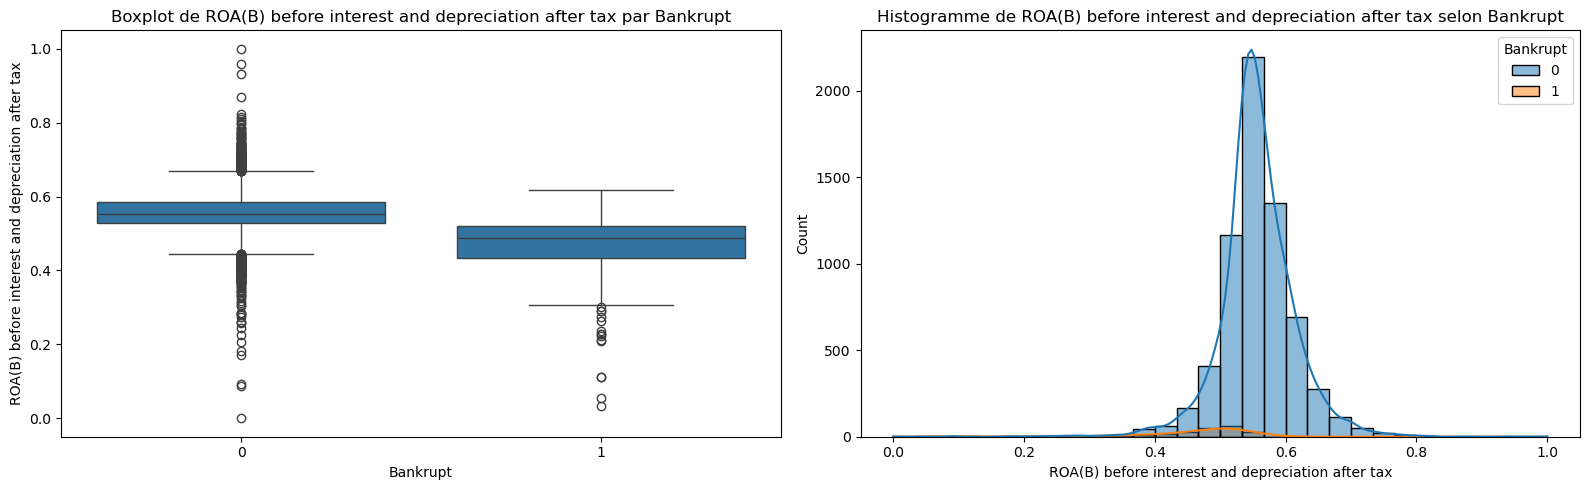

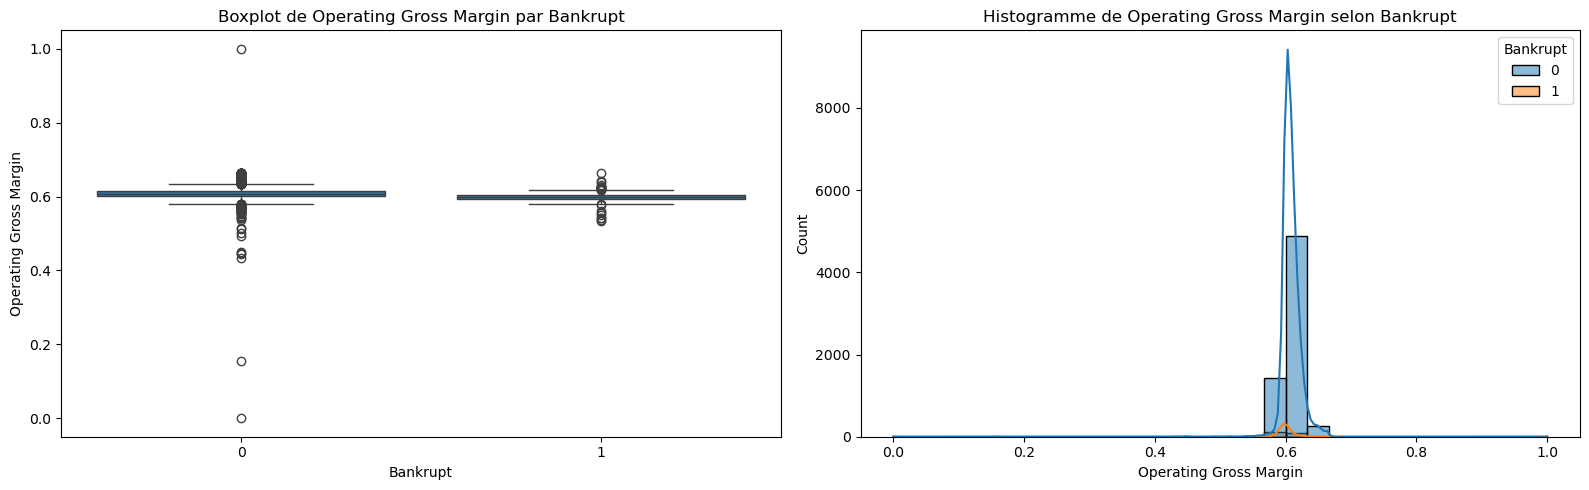

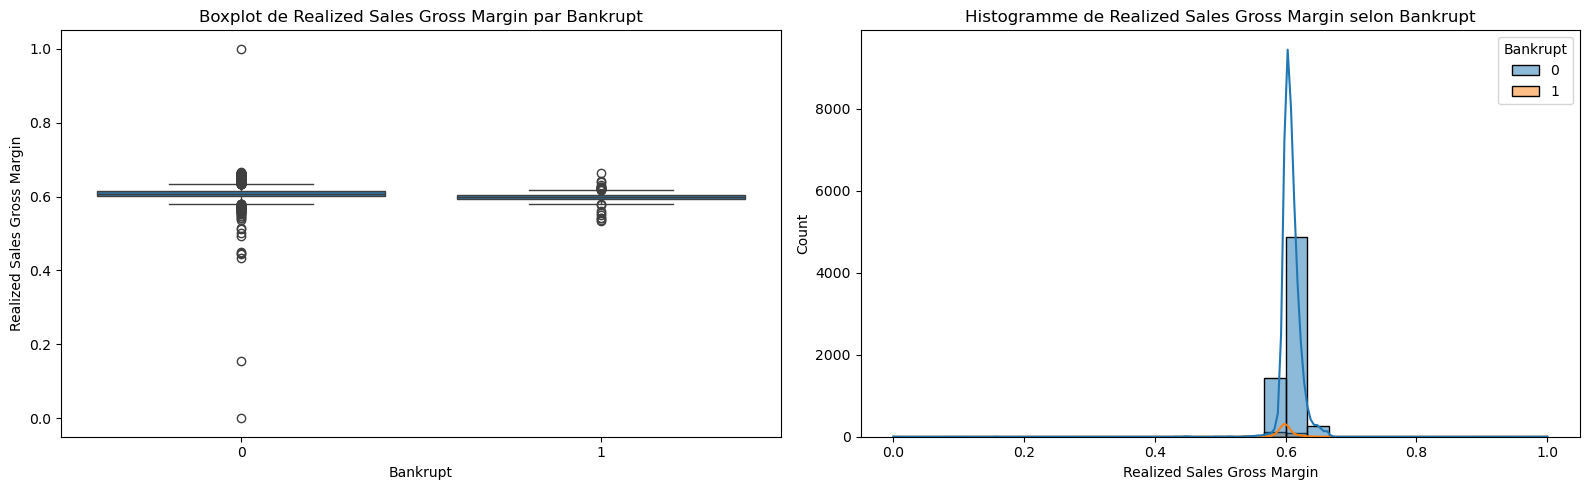

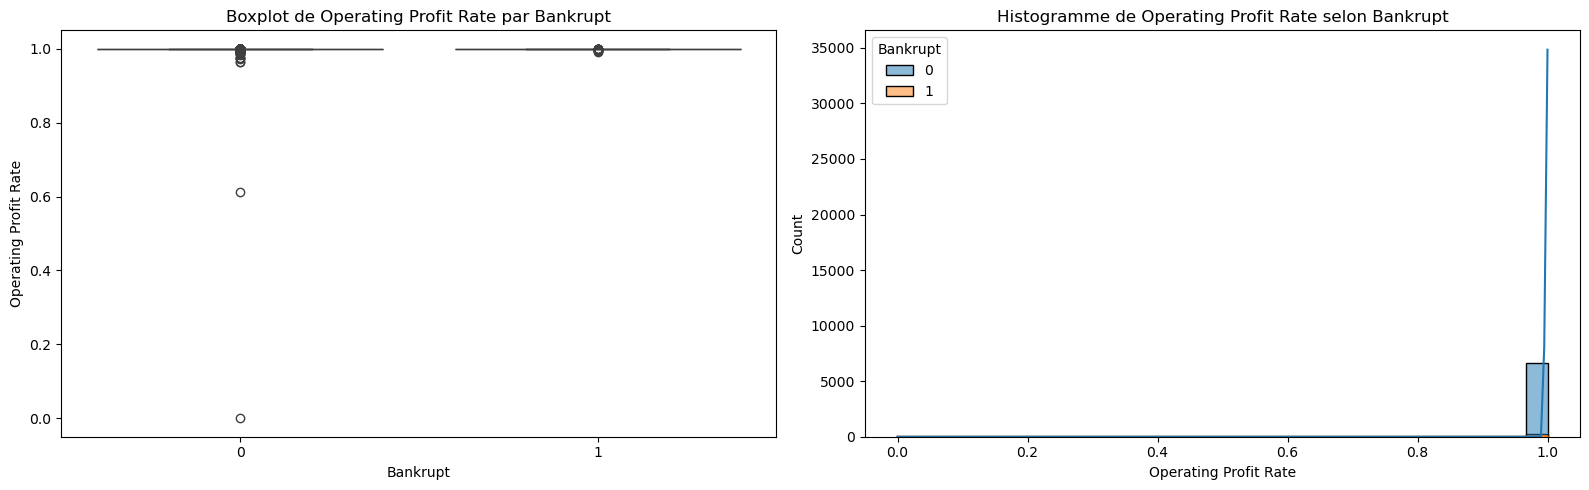

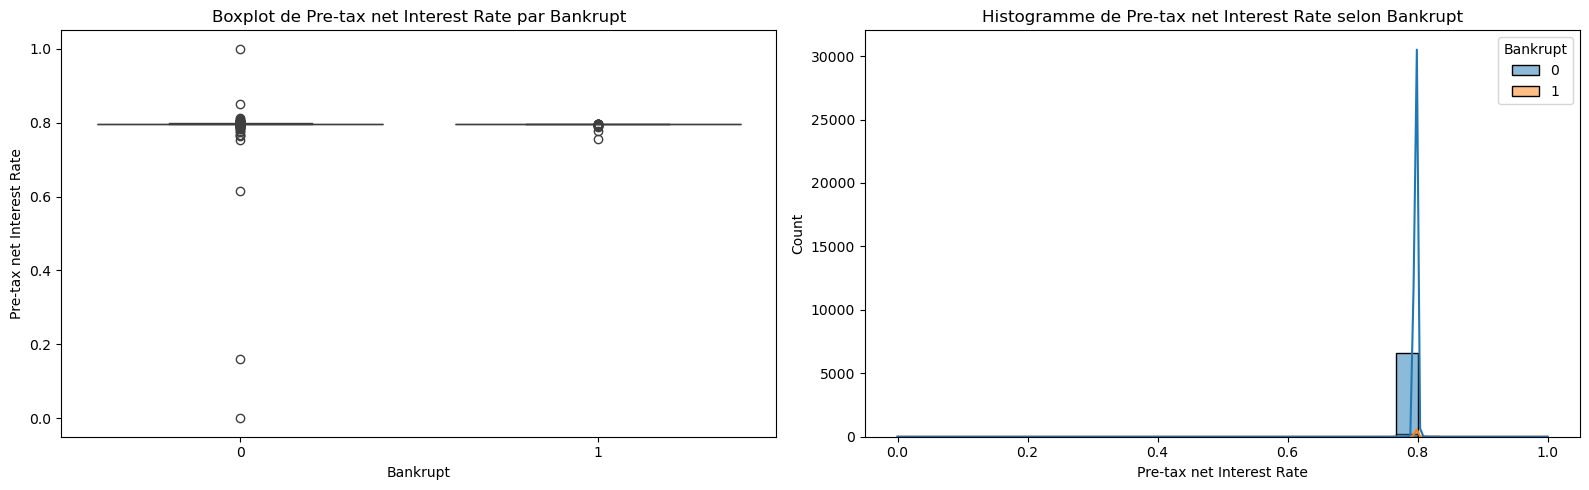

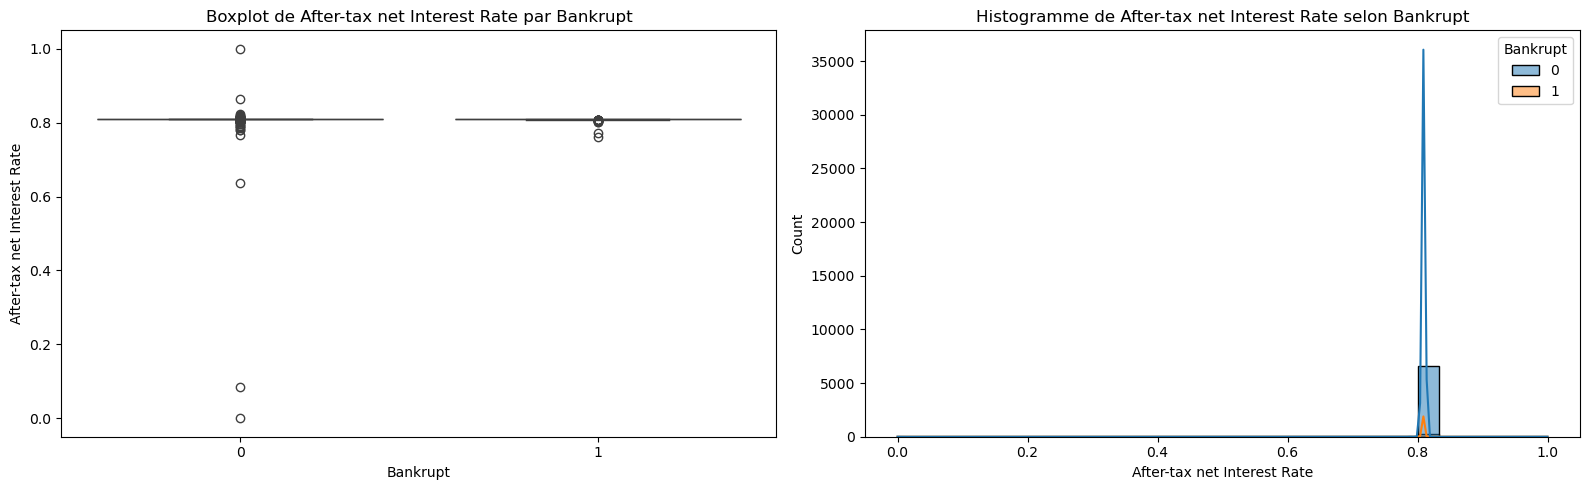

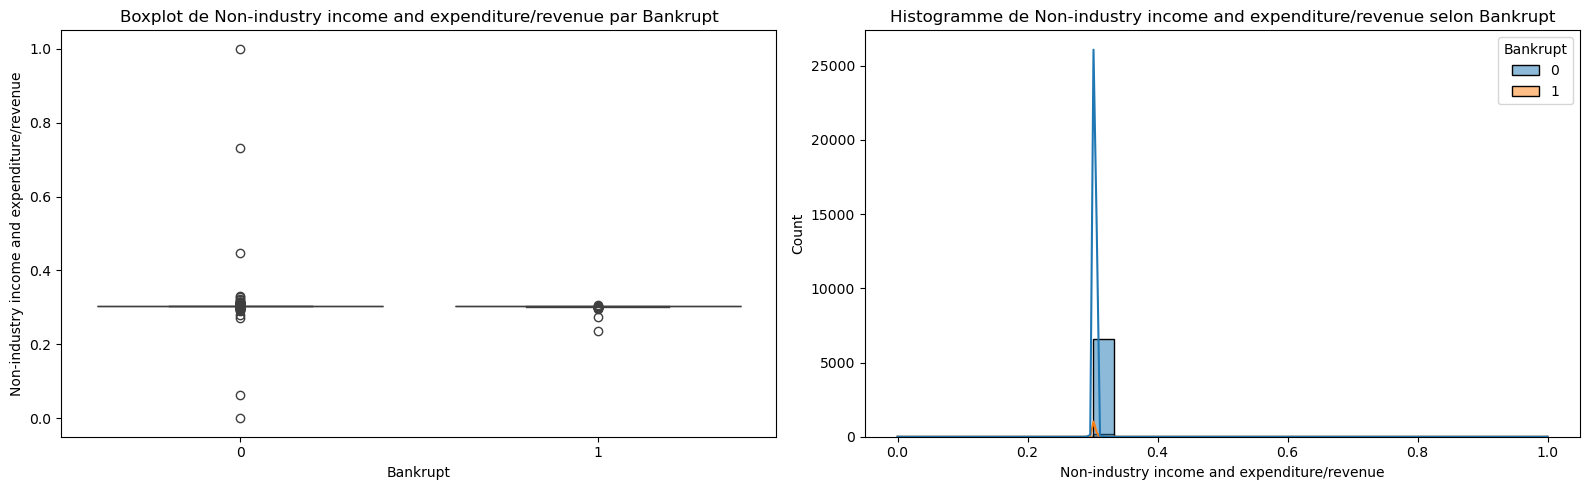

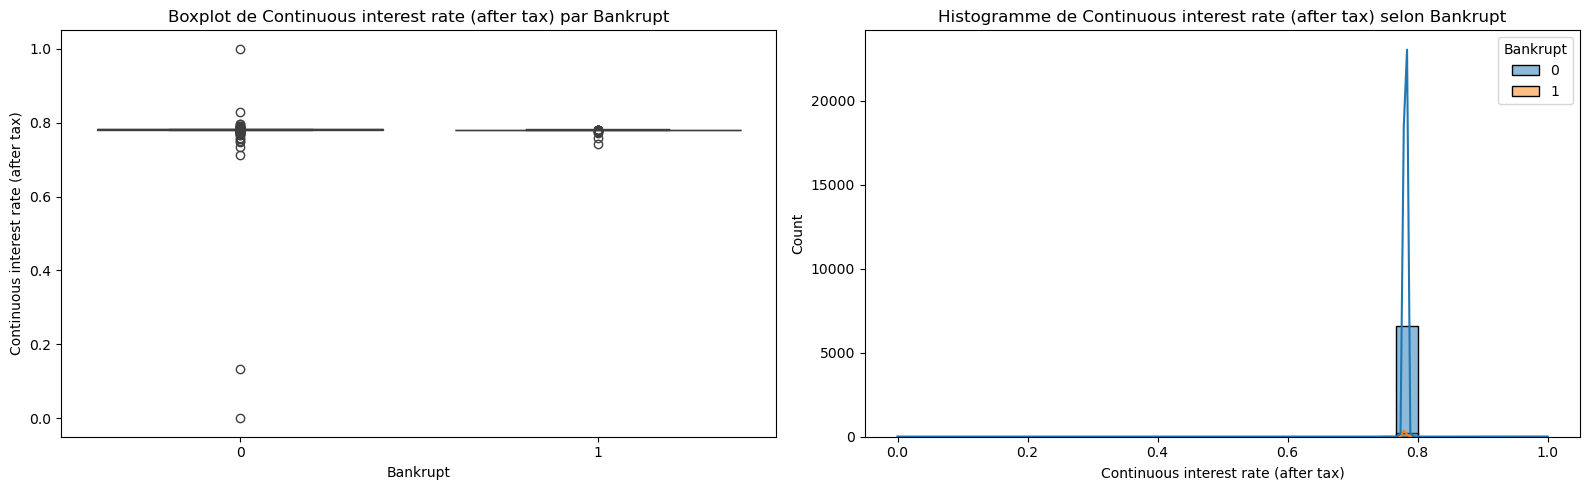

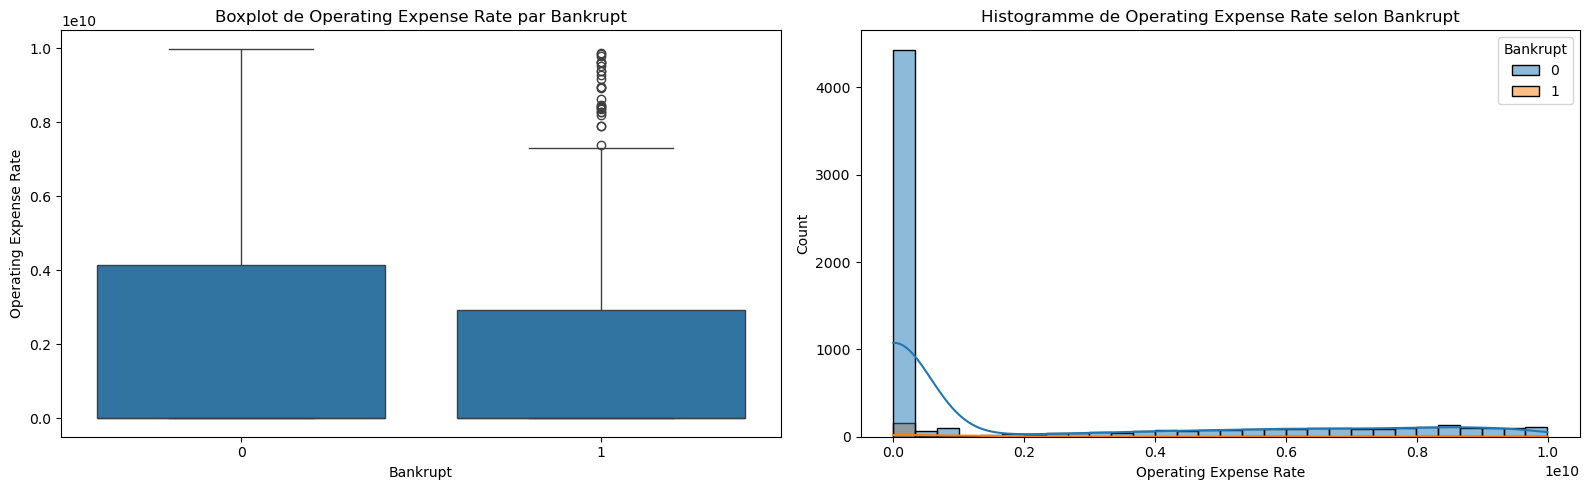

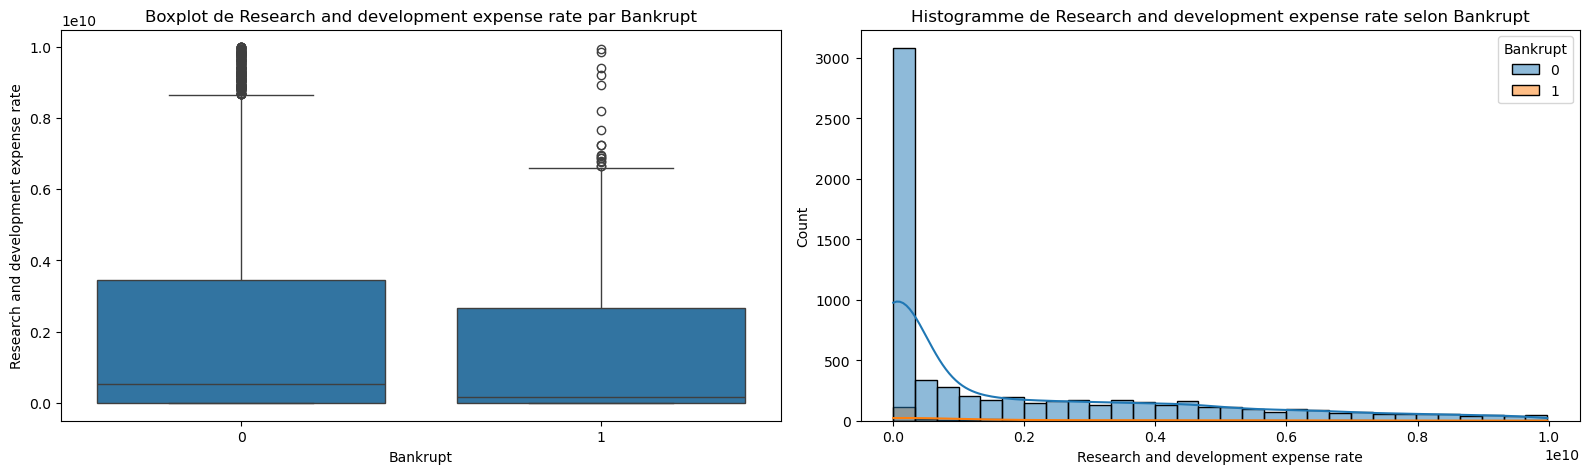

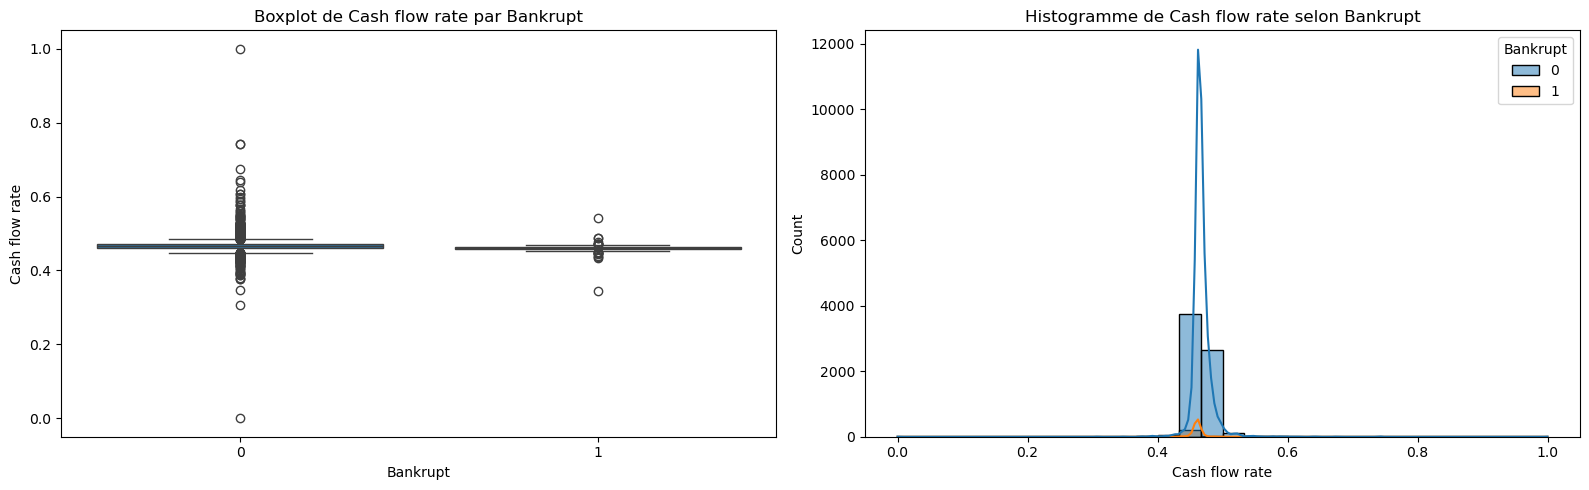

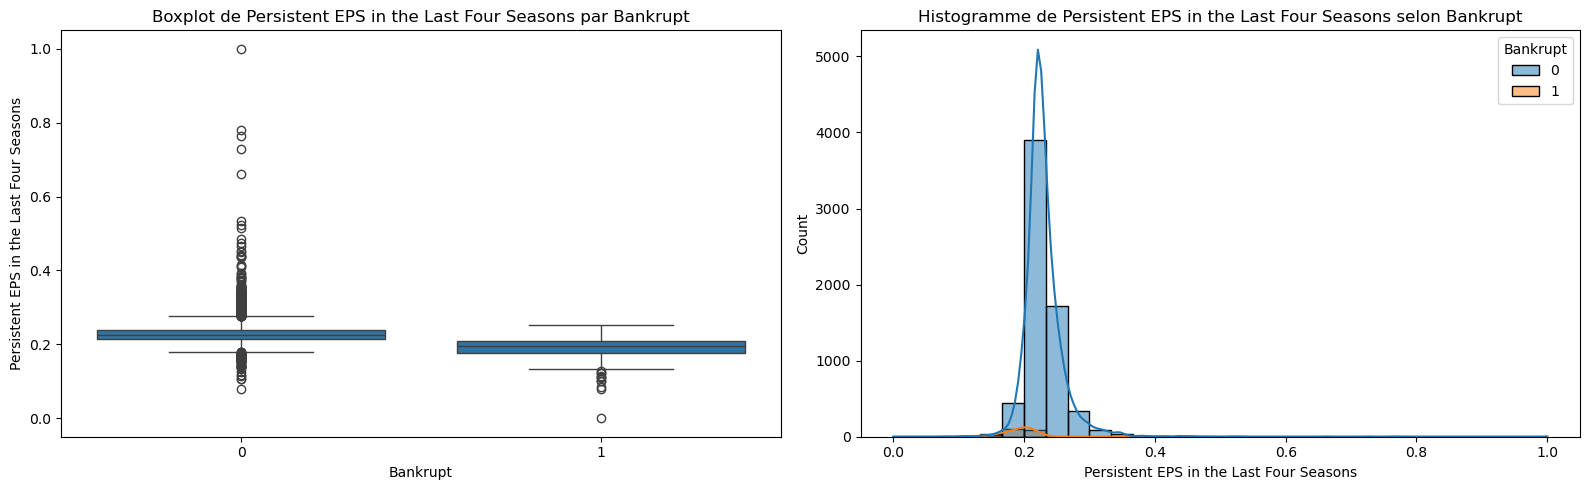

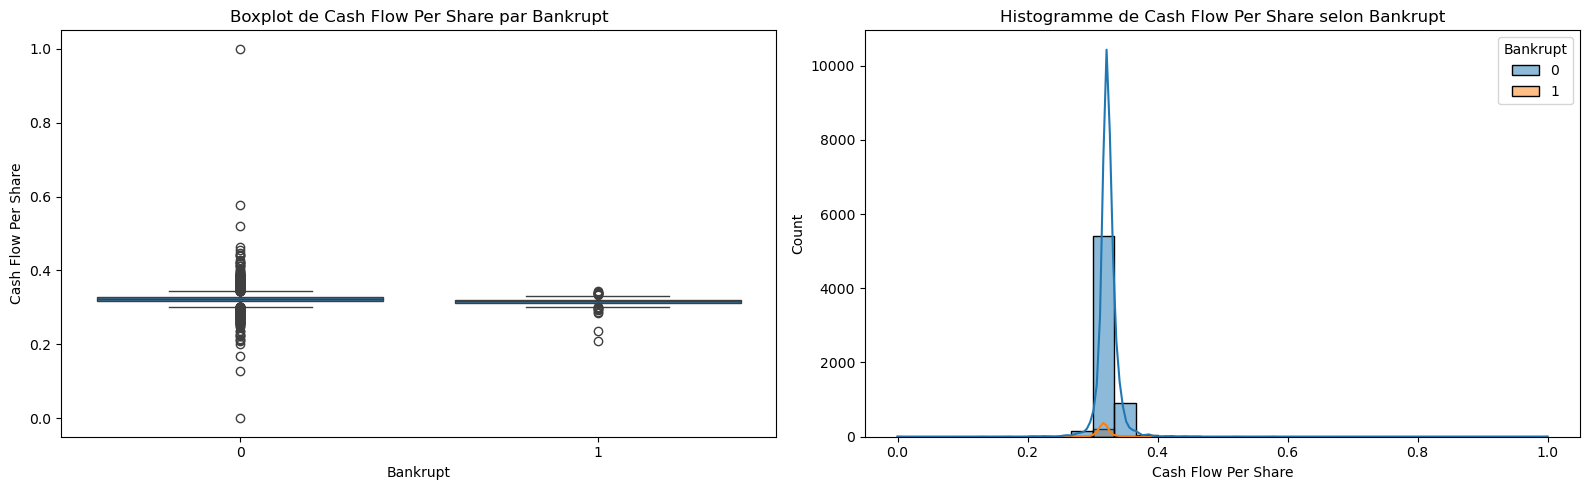

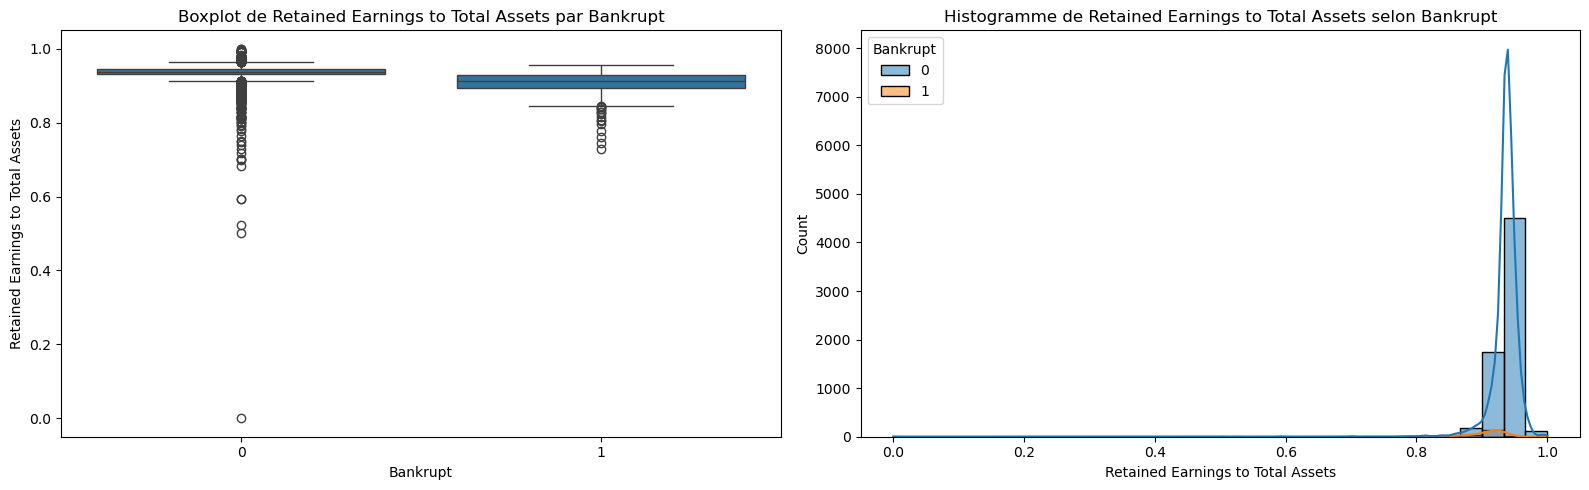

In [6]:
for col in solvabilite:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Boxplot
    sns.boxplot(x='Bankrupt', y=col, data=data_solv, ax=axes[0])
    axes[0].set_title(f'Boxplot de {col} par Bankrupt')

    # Histogramme
    sns.histplot(data=data_solv, x=col, hue='Bankrupt', kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Histogramme de {col} selon Bankrupt')

    plt.tight_layout()
    plt.show()


Assimétrie entre entreprises en faillite ou non : 
- "ROA(C) before interest and depreciation before interest", 
- "ROA(A) before interest and % after tax",
- "ROA(B) before interest and depreciation after tax", 


Possibilité de passer en variable qualitative les variables quantitatives suivantes : 
- "Operating Expense Rate", 
- "Research and development expense rate"

Pour fair autre chose que de la recherche de faillite


### CAH sur les entreprises

In [91]:
data_quant = data[[col for col in data.columns if col in solvabilite]]

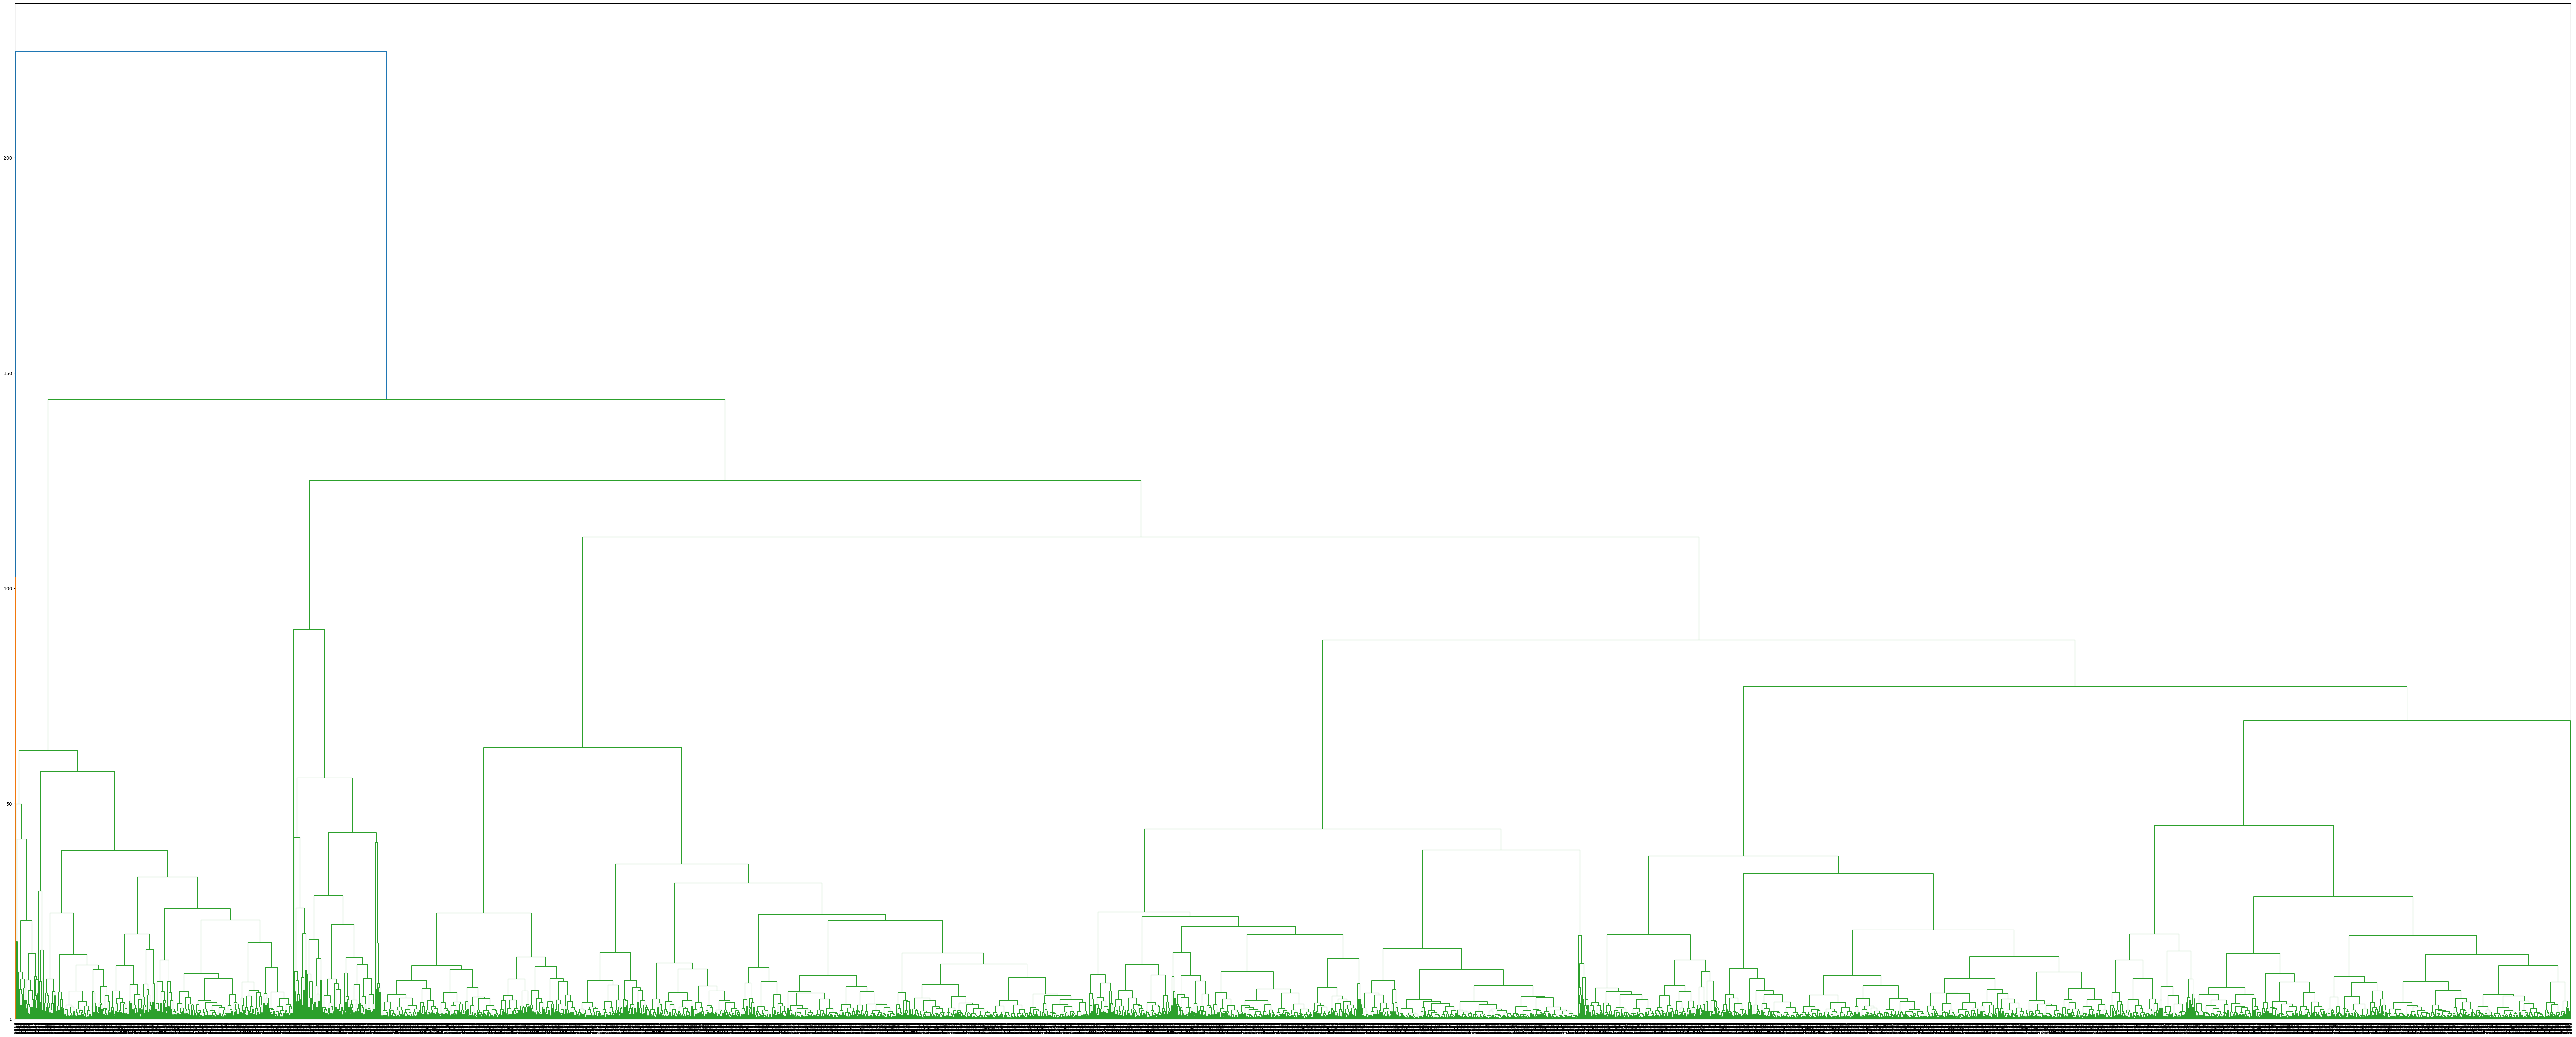

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Normalisation des variables numériques
norm = StandardScaler()
quantiative_norm = norm.fit_transform(data_quant)

cls = AgglomerativeClustering(metric="euclidean", linkage="ward", distance_threshold=0, n_clusters=None)
cls.fit(quantiative_norm)
plt.figure(figsize=(100, 40))
plot_dendrogram(cls)

On remarque X clusters

### AFTD sur les entreprises

In [14]:
# Prend trop de temps
#aftd = MDS(n_components=2, dissimilarity='euclidean')
#dist = aftd.fit_transform(quantiative_norm)
#print(aftd.stress_)
#plt.scatter(*dist.T)
#plt.show()

In [ ]:
#plot_Shepard(aftd)
#plt.show()

### ACP

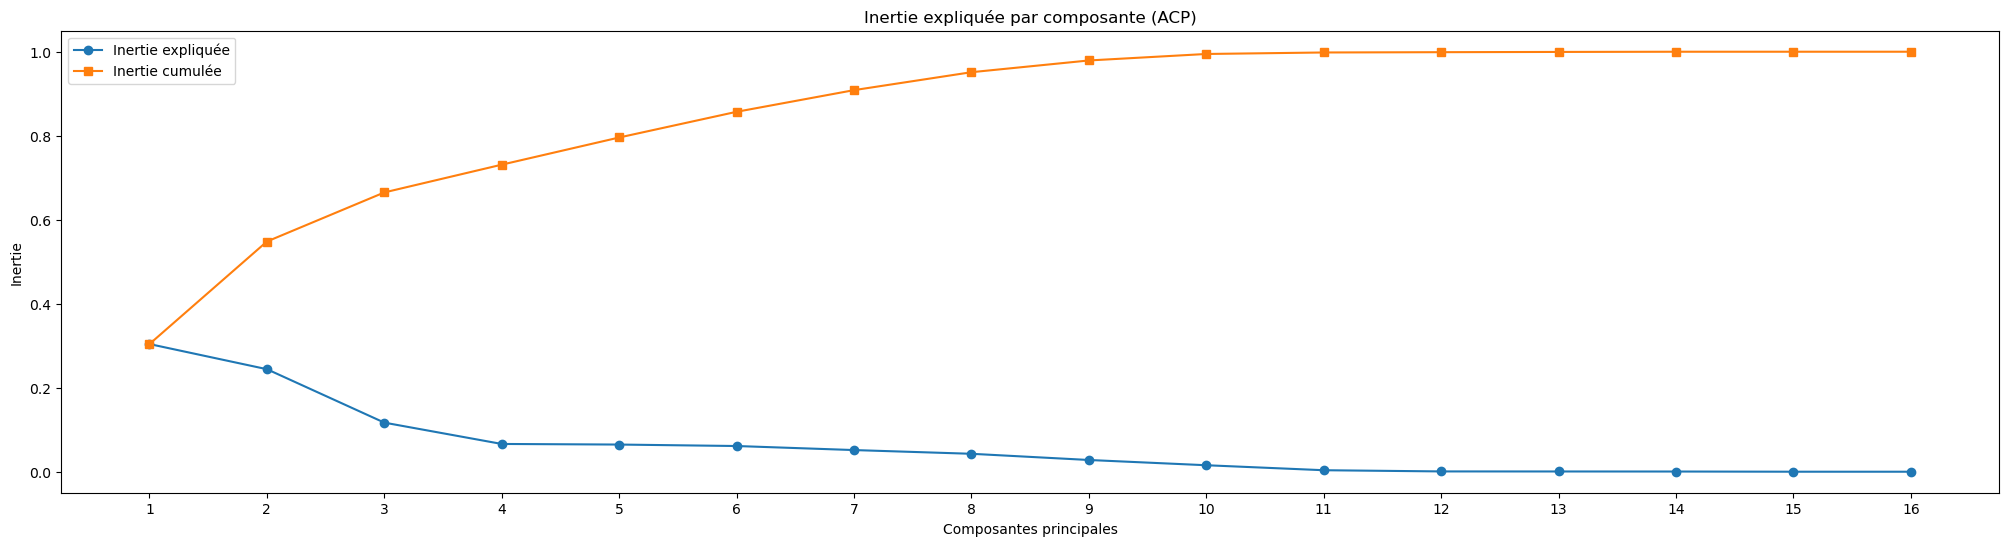

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cls = PCA()
pcs = cls.fit_transform(quantiative_norm)

# Inertie expliquée et cumulée
inertie_exp = cls.explained_variance_ratio_
cumul_inertie = inertie_exp.cumsum()

plt.figure(figsize=(25, 6))
plt.plot(range(1, len(inertie_exp) + 1), inertie_exp, marker='o', label="Inertie expliquée")
plt.plot(range(1, len(cumul_inertie) + 1), cumul_inertie, marker='s', label="Inertie cumulée")
plt.xticks(range(1, len(inertie_exp) + 1))
plt.xlabel("Composantes principales")
plt.ylabel("Inertie")
plt.title("Inertie expliquée par composante (ACP)")
plt.legend()

<Axes: xlabel='PC1', ylabel='PC2'>

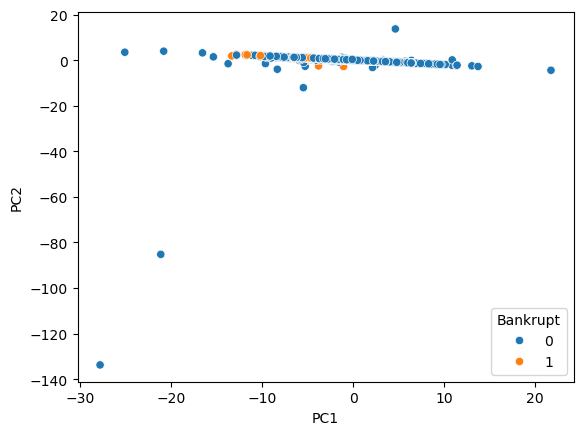

In [226]:
data_acp = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, len(inertie_exp)+1)])
data_acp['Bankrupt'] = data['Bankrupt?'].values
data_acp['Liability-Assets Flag']=data['Liability-Assets Flag'].values

sns.scatterplot(x="PC1", y="PC2", hue=data_acp.Bankrupt, data=data_acp)

<Axes: xlabel='PC1', ylabel='PC16'>

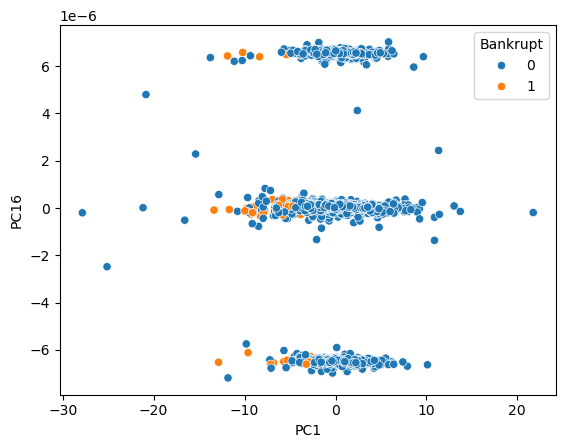

In [227]:
sns.scatterplot(x="PC1", y="PC16", hue=data_acp.Bankrupt, data=data_acp)

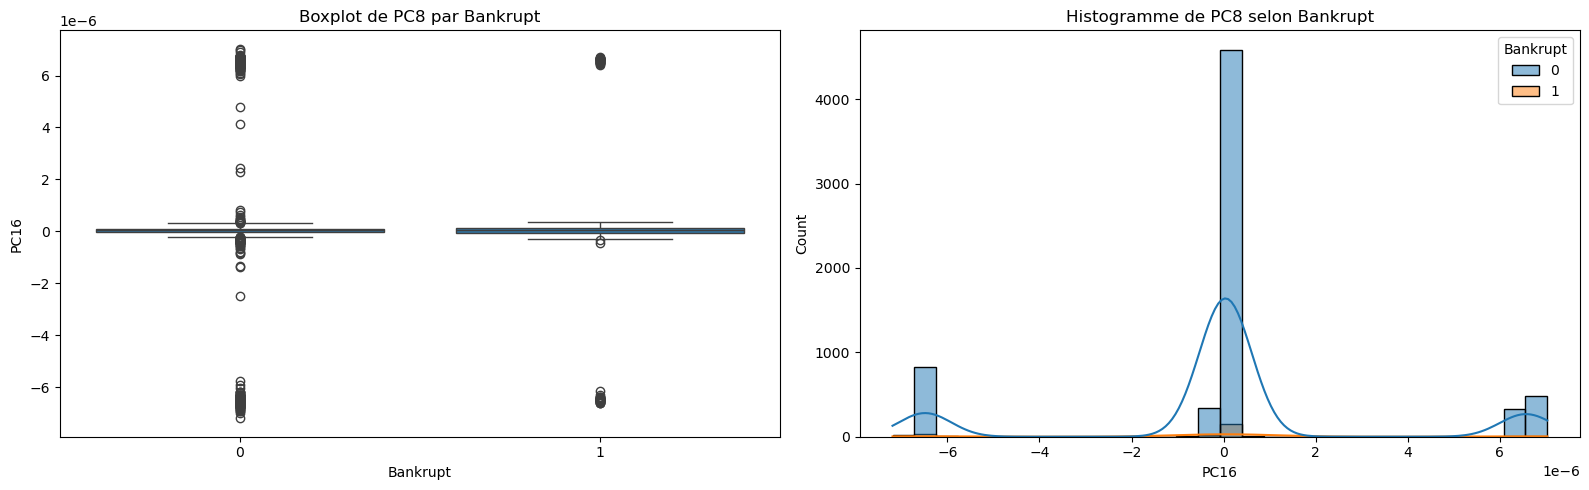

In [229]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Boxplot
sns.boxplot(x='Bankrupt', y='PC16', data=data_acp, ax=axes[0])
axes[0].set_title(f'Boxplot de PC8 par Bankrupt')

# Histogramme
sns.histplot(data=data_acp, x='PC16', hue='Bankrupt', kde=True, bins=30, ax=axes[1])
axes[1].set_title(f'Histogramme de PC8 selon Bankrupt')

plt.tight_layout()
plt.show()

In [187]:
# Matrice des composantes principales
components = cls.components_ 
components[15]

array([ 3.76519337e-08,  4.36746903e-08, -5.21760467e-08, -2.49638384e-07,
        1.64948935e-07,  7.35046039e-01, -6.07282211e-01,  1.29176815e-08,
        3.01522198e-01, -7.66990810e-07, -5.08046450e-08, -8.26564451e-09,
       -3.33845660e-08, -6.23636184e-08,  7.28577481e-08,  4.18441460e-08])

# PC16 très intéréssante !!!!